<a href="https://colab.research.google.com/github/tracyrookie/social_media_analytics/blob/main/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
This notebook provides some skeleton code to get you started on the homework. Add in your own code and markdown cells to answer the homework questions. If you want to submit the notebook as a PDF, make sure your code and markdowns are clear and concise to make grading easy for the TAs.

This notebook can be opened in Colab 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zlisto/social_media_analytics/blob/main/HW2.ipynb)


Before starting, select "Runtime->Factory reset runtime" to start with your directories and environment in the base state.

If you want to save changes to the notebook, select "File->Save a copy in Drive" from the top menu in Colab. This will save the notebook in your Google Drive.



# Clone GitHub Repository
This will clone the repository to your machine. This includes the code and data files. Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_analytics

import os
os.chdir("social_media_analytics")

Cloning into 'social_media_analytics'...
remote: Enumerating objects: 461, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 461 (delta 12), reused 17 (delta 5), pack-reused 435
Receiving objects: 100% (461/461), 47.03 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (244/244), done.
Updating files: 100% (56/56), done.


In [ ]:
!pip install -r requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import umap
import gensim.downloader as api
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

import sklearn.cluster as cluster
from sklearn import metrics
from scipy import stats

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import scripts.TextAnalysis as ta
from scripts.api import *

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


# Problem 1. Cluster a User's Tweets (57 points)

In this problem we are going to cluster the tweets of a single user.  Our goal is to determine different topics this person tweets about.  

The user is social media influencer Kim Kardashian, with screen name is KimKardashian.

#### 1. (12 points) Load tweets

Load the tweets into a dataframe and call it `df`. The tweets are in the file `"data/HW2.db"` in the table `"user_tweets"`.  Remeber that you do not need to put the `.db` in the filename when loading the tweets.  Remove all columns except `"screen_name"` and `"text"`.   Then, use the `text_clean` function to clean the text and remove any clean tweets with length equal to zero.  Finally, select from `df` only the tweets where `"screen_name"` equals KimKardashian and call the dataframe `df_kim`.  Use the `.copy()` function to make `df_kim` a copy of the original dataframe so we can add columns to it later safely.

How many tweets are in `df_kim` after this process?  Print out your answer.

Print the head of the `df_kim`.  



In [ ]:
fname_db = "data/HW2"
df = DB.fetch(table_name="user_tweets",path=fname_db)


df = df[ ['screen_name','text'] ]
df['text_clean'] = df.text.apply(ta.clean_tweet)
df = df[df.text_clean.str.len()>0]

df_kim = df[df.screen_name == "KimKardashian"].copy()

n = len(df_kim)
print(f'There are {n} tweets in df_kim after cleaning')
df_kim.head()

There are 941 tweets in df_kim after cleaning


,screen_name,text,text_clean
788,KimKardashian,Just added new items to my #KardashianKloset 🛍...,just added new items to my kardashiankloset
789,KimKardashian,"RT @skims: Run, don’t walk. The ultra-flatteri...",skims run dont walk the ultraflattering sheer ...
790,KimKardashian,still spamming vacay pics 💕 https://t.co/yBUDo...,still spamming vacay pics
791,KimKardashian,Let’s exercise together in Kim Kardashian: Hol...,lets exercise together in kim kardashian holly...
792,KimKardashian,Caramel Orchid is todays vibe https://t.co/oOe...,caramel orchid is todays vibe


#### 2. (6 points) TF Embedding
Calculate the term frequency embedding of the KimKardashian tweets.  

How big is the vocabulary?  Print your answer.

In [ ]:
tf_vectorizer = CountVectorizer(min_df = 5, stop_words = 'english')

tf_embedding = tf_vectorizer.fit_transform(df_kim.text_clean)
tf_feature_names = tf_vectorizer.get_feature_names_out()

nvocab = len(tf_feature_names)
print (f'{nvocab} words in vocabulary')

349 words in vocabulary


#### 3. (12 points) Fit LDA Model

Fit an LDA model to the KimKardashian tweets with 3 topics.  

Make a pyLDAviz visualization of the topics.  

In [ ]:
%%time
num_topics = 3
# fit LDA model
lda = LatentDirichletAllocation(n_components = num_topics, max_iter=5, 
                                learning_method = "online",learning_offset = 50.,
                                random_state = 0).fit(tf_embedding)
# make pyLDAvis visualization
viz = pyLDAvis.sklearn.prepare(lda, tf_embedding, tf_vectorizer)
pyLDAvis.display(viz)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


CPU times: user 1.04 s, sys: 49.7 ms, total: 1.09 s
Wall time: 2.82 s


#### 4. (5 points) LDA Embedding

Use the fit LDA model to convert the tf embedding into a topic vector embedding for the tweets.  

What is the dimension of the embedding?  Print your answer.

In [ ]:
lda_embedding = lda.transform(tf_embedding)
ntweets = len(df_kim.text_clean)
print(f"{ntweets} tweets,{num_topics} topics in LDA model")
print(f"shape of lda embedding is {lda_embedding.shape}")

941 tweets,3 topics in LDA model
shape of lda embedding is (941, 3)


5. (9 points) K-Means Clustering

Calculate the k-means clusters of the LDA topic vectors using 3 clusters.  Add a column to the dataframe with the tweets called `"kmeans_label_lda"` that contains the k-means cluster labels.

In [ ]:
n_clusters = 3
kmeans_label = cluster.KMeans(n_clusters=n_clusters).fit_predict(lda_embedding) 
df_kim['kmeans_label_lda'] = [str(x) for x in kmeans_label]


#### 6. (13 points) Cluster Wordclouds

Plot the word cloud for each cluster (a `for` loop might be useful here).  Don't forget to remove stopwords.   Also add "kimkardashian" (all lowercase) to the stopwords set.  Since Kim's screen name is a common word in this corpus, we don't need to display it in the wordclouds.

In [ ]:
# define wordcloud graph function
def kmeans_wordcloud_userhist(df, cluster_label_column,stopwords):
    print(cluster_label_column)
    for k in np.sort(df[cluster_label_column].unique()):
        s=df[df[cluster_label_column]==k]
        text=' '.join(s.text_clean.tolist()).lower()
        wordcloud = WordCloud(stopwords=stopwords,max_font_size=150, max_words=100, background_color="white",width=1000, height=600)
        wordcloud.generate(text)
     
        print(f"\n\tCluster {k} {cluster_label_column} has {len(s)} tweets")
        plt.figure(figsize = (16,4))
        plt.subplot(1,2,1)
        ax = sns.countplot(data = s, x = 'screen_name')
        plt.xticks(rotation=45)
        plt.ylabel("Number of tweets")
        plt.xlabel("Screen name")

        plt.subplot(1,2,2)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    return 1

kmeans_label_lda

	Cluster 0 kmeans_label_lda has 356 tweets


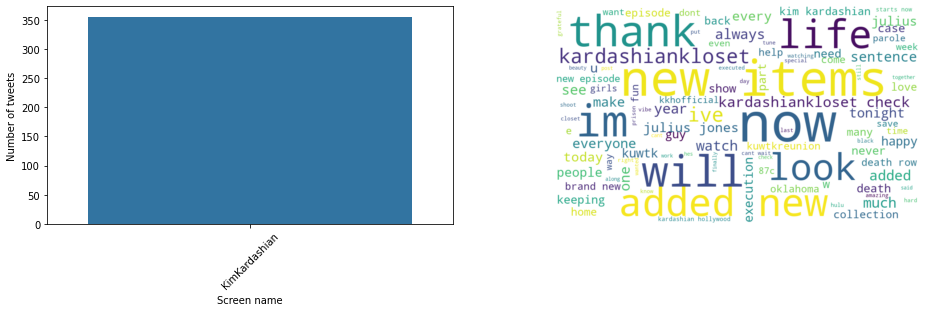


	Cluster 1 kmeans_label_lda has 315 tweets


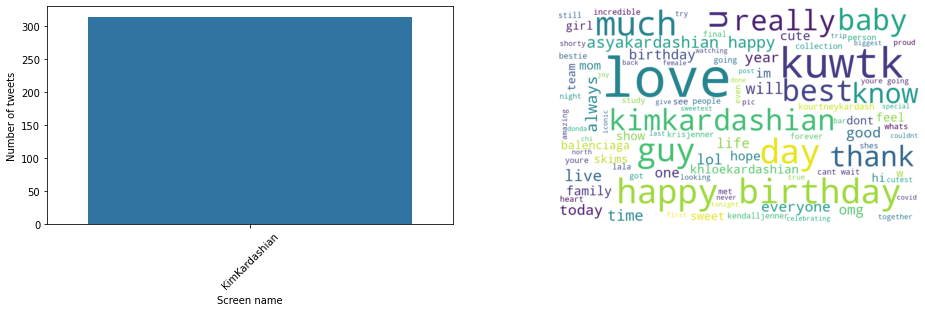


	Cluster 2 kmeans_label_lda has 270 tweets


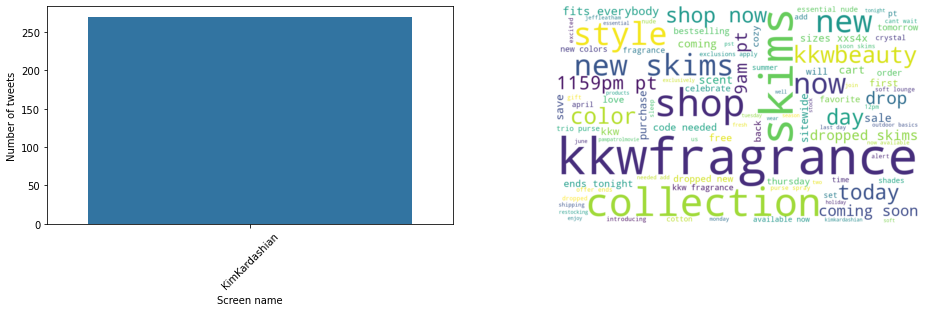

1

In [ ]:
# plot the wordcloud
stopwords = set(STOPWORDS).add('kimkardashian')

cluster_label_column= 'kmeans_label_lda'
kmeans_wordcloud_userhist(df_kim,cluster_label_column,stopwords)

#### 7. (0 points) Cluster Analysis

If you are not familiar with American pop culture these word clouds may not make any sense to you.  But if you are, or are curious about Kim Kardashian's tweet topics, try to provide a unifying theme for each cluster based on the word clouds.  This question is for fun, so no worries if you want to skip it.

**your answer here**





1. positive attitude since she basically advertises her lifestyle
2. fashion, makeup, her own brand and other products
3. family and friends

# Problem 2. Finding User Communities by Clustering Tweets (54 points)

In this problem we are going to cluster the tweets from multiple Twitter users.  We are going to try and form communities of people from these tweet clusters.  

#### 1. (8 points) Load tweets

Load the tweets into a dataframe and call it `df`. The tweets are in the file `"data/HW2.db"` in the table `"user_tweets"`.  Remove all columns except `"screen_name"` and `"text"`.   Then, use the `text_clean` function to clean the text and remove any clean tweets with length equal to zero.  

How many tweets in `df`?  Print your answer. 

Print a random sample of five tweets from `df`.



In [ ]:
fname_db = "data/HW2"
df = DB.fetch(table_name="user_tweets",path=fname_db)


df = df[ ['screen_name','text'] ]
df['text_clean'] = df.text.apply(ta.clean_tweet)
df = df[df.text_clean.str.len()>0]

n = len(df)
print(f"There are {n} tweets in df")

df.sample(5)

There are 4954 tweets in df


,screen_name,text,text_clean
3863,AOC,RT @USProgressives: Our statement in support o...,usprogressives our statement in support of rep...
4167,RashidaTlaib,.@SecBlinken must demand an end to Israel's pr...,secblinken must demand an end to israels pract...
4431,RashidaTlaib,RT @RepAndyLevin: Can we really even debate th...,repandylevin can we really even debate the nec...
3342,AOC,@JamaalBowmanNY Thank you brother 💞,jamaalbowmanny thank you brother
1038,KimKardashian,"RT @KKWFRAGRANCE: No tricks, just treats... Do...",kkwfragrance no tricks just treats dont miss y...


#### 2. (6 points) TF-IDF Embedding

Calculate the term frequency inverse document frequency (tf-idf) embedding of the tweets.  How big is the vocabulary?  Print your answer.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df = 5, stop_words = 'english')
tfidf_embedding = tfidf_vectorizer.fit_transform(df.text_clean)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

nvocab = len(tfidf_feature_names)
print(f"The vocabulary is {nvocab} words")

The vocabulary is 2223 words


#### 3. (6 points) UMAP Embedding
Calculate the 2 dimensional UMAP embedding of the tf-idf embedding.  Then add two columns to `df` called `"umap_tfidf_x"` and `"umap_tfidf_y"` equal to the x and y coordinates of the UMAP embedding.

In [ ]:
%%time
umap_tfidf_embedding = umap.UMAP(n_components=2, metric='hellinger').fit_transform(tfidf_embedding)

#zscoring centers the vectors at zero
umap_tfidf_embedding = stats.zscore(umap_tfidf_embedding,nan_policy='omit')

df['tfidf_umap_x'] = umap_tfidf_embedding[:,0]
df['tfidf_umap_y'] = umap_tfidf_embedding[:,1]

/usr/local/lib/python3.8/dist-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 2115 edges.
It has only fully disconnected 71 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


CPU times: user 1min 3s, sys: 553 ms, total: 1min 4s
Wall time: 1min 1s


#### 4. (8 points) K-Means Clustering

Calculate the k-means clusters of the umap embedding using four clusters.  Add a column to the dataframe with the tweets called `"kmeans_label_tfidf_umap"` that contains the kmeans cluster labels.

In [ ]:
n_clusters = 4
kmeans_label = cluster.KMeans(n_clusters=n_clusters).fit_predict(np.nan_to_num(umap_tfidf_embedding))
df['kmeans_label_tfidf_umap'] = [str(x) for x in kmeans_label]


#### 5. (10 points) Scatterplots

Make two scatter plots of the UMAP embedding: one where the `hue` is the screen name of the user, and the other where the `hue` is the k-means cluster label.  Be sure to include a legend and a title for each plot.

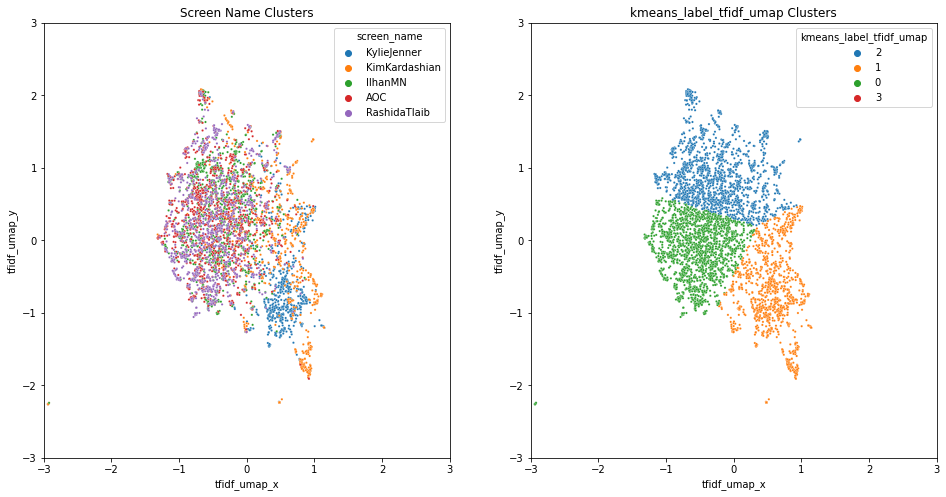

In [ ]:
embedding_types = ['tfidf_umap']
s = 5
xmax,ymax = 3,3

for embedding_type in embedding_types:
  fig = plt.figure(figsize = (16,8))
  ax1 = plt.subplot(1,2,1)
  kmeans_label = f"kmeans_label_{embedding_type}"
  sns.scatterplot(data=df, x=f"tfidf_umap_x", 
                    y=f"tfidf_umap_y", 
                    hue="screen_name", s=s)
  plt.title("Screen Name Clusters")

  plt.xlim([-xmax, xmax])
  plt.ylim([-ymax,ymax])

  ax2 = plt.subplot(1,2,2)
  sns.scatterplot(data=df, x=f"tfidf_umap_x", 
                    y=f"tfidf_umap_y", 
                    hue=kmeans_label, s=s)
  plt.title(f"{kmeans_label} Clusters");
   
  plt.xlim([-xmax, xmax])
  plt.ylim([-ymax,ymax])
  plt.show()

#### 6. (14 points) Wordcloud and Screen Name Histogram

Plot the word cloud and screen name histogram in each cluster using the `subplot` function (a `for` loop might be useful here).  Don't forget to remove stopwords.

In [ ]:
stopwords = set(STOPWORDS)

def kmeans_wordcloud_userhist(df, cluster_label_column,stopwords):
    print(cluster_label_column)
    for k in np.sort(df[cluster_label_column].unique()):
        s=df[df[cluster_label_column]==k]
        text=' '.join(s.text_clean.tolist()).lower()
        wordcloud = WordCloud(stopwords=stopwords,max_font_size=150, max_words=100, background_color="white",width=1000, height=600)
        wordcloud.generate(text)
     
        print(f"\n\tCluster {k} {cluster_label_column} has {len(s)} tweets")
        plt.figure(figsize = (16,4))
        plt.subplot(1,2,1)
        ax = sns.countplot(data = s, x = 'screen_name')
        plt.xticks(rotation=45)
        plt.ylabel("Number of tweets")
        plt.xlabel("Screen name")

        plt.subplot(1,2,2)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    return 1

kmeans_label_tfidf_umap

	Cluster 0 kmeans_label_tfidf_umap has 1857 tweets


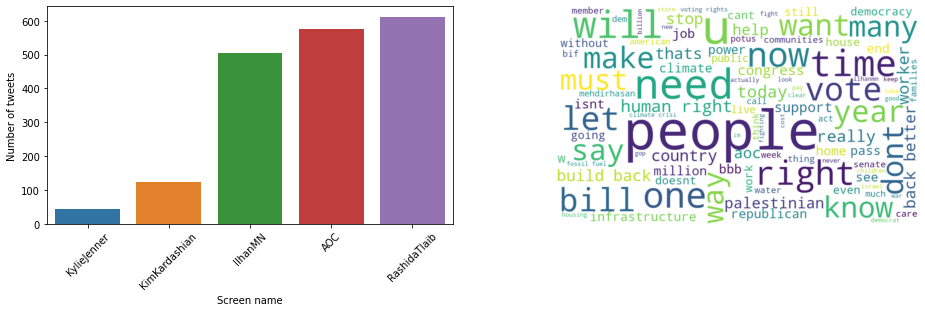


	Cluster 1 kmeans_label_tfidf_umap has 1181 tweets


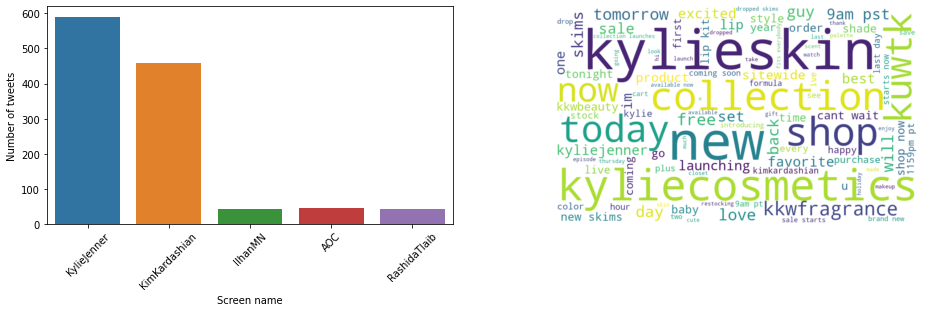


	Cluster 2 kmeans_label_tfidf_umap has 1730 tweets


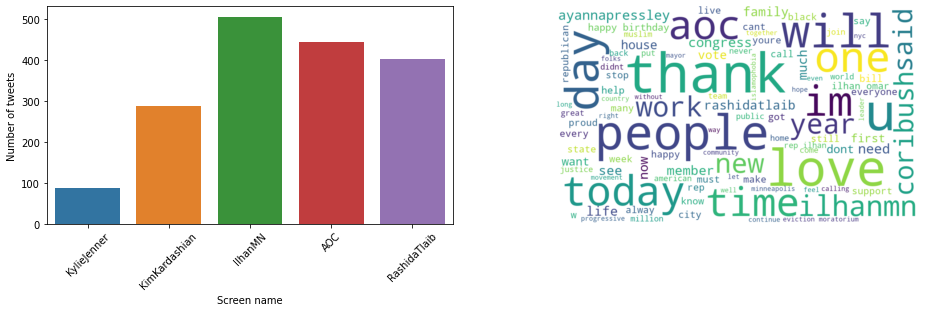


	Cluster 3 kmeans_label_tfidf_umap has 186 tweets


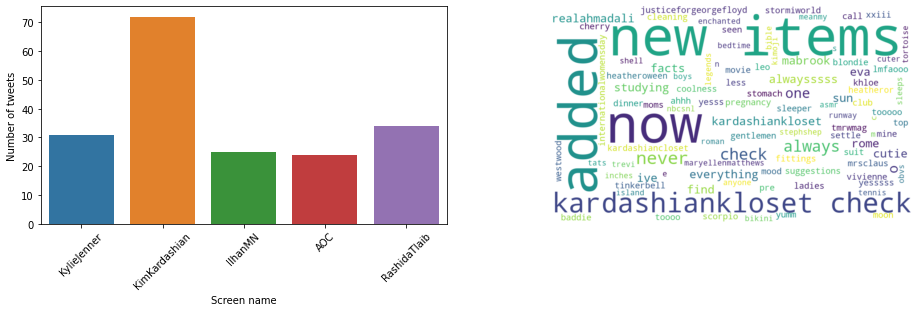

1

In [ ]:
stopwords = set(STOPWORDS)
cluster_label_column= 'kmeans_label_tfidf_umap'
kmeans_wordcloud_userhist(df,cluster_label_column,stopwords )

#### 7. (2 points) Cluster Analyis

You might notice that in each cluster certain users have many tweets while others have very few.  Look at the screen name histograms and try to identify two distinct communities of users.  Who are in these communities and what is their unifying theme?  It will be helpful to look up who these users are.

**your answer here**

1. Cluster 1 seems to be about cosmetics, fragrances and Kim's own brands, so Kylie and Kim score very high but the rest are very low in this regard
2. Cluster 2 seems to be about politics or politically motivated so AOC, LlhanMN and RashidaTlaib score very high whereas Kylie and Kim are not into this topic. 

In [ ]:
!jupyter nbconvert --to html </content/Copy_of_HW2.ipynb>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `jupyter nbconvert --to html </content/Copy_of_HW2.ipynb>'
